# Introduction

Recall the monkey psychophysics experiment from the last tutorial, where a monkey had to discriminate the movement direction of dots for varying degrees of motion coherence. We will now focus on understanding the monkeys' reaction times. In the first part, we'll analyze the data further to see how the reaction time distributions look like. In the second part, we aim to understand these distributions in the framework of the drift diffusion model.

## Prerequisites

- two-alternative forced choice task
- Drift Diffusion Model
- basic Python skills, including plotting, histograms, some numpy and functions

## Objectives

- What do reaction time distributions look like?
- How do distributions for correct and incorrect trials differ?
- How can these properties be understood in terms of the Drift Diffusion Model?
- simulate the Drift Diffusion Model

# Problem 1: Reaction time distributions in psychophysics data

In [1]:
%matplotlib inline
from __future__ import division
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

import warnings
warnings.filterwarnings('ignore')

## Load the data

As before, the data we will use is in a file called `dots_psychophysics.txt` in the directory `data`. Compared to the last tutorial, the data file contains one additional column, the reaction times, i.e. the now five columns represent:

**coherence direction choice correct reactiontime**,

where `coherence` is the strength of the stimulus, `direction` is the true direction of the stimulus, `choice` is the choice the monkey made and `correct` specifies whether the answer was correct (and the animal rewarded) and `reaction time` is how long it took the monkey to respond (in ms).

Now load the data. 

In [2]:
dotsData = pd.read_csv('dots_psychophysics.txt', 
                       delimiter=' ', skipinitialspace=True, index_col=None, header=None, 
                       names=['coherence', 'direction', 'choice', 'correct', 'reactionTime'])
dotsData.head()

,coherence,direction,choice,correct,reactionTime
0,0.128,2.0,2.0,1.0,622.675
1,0.000,1.0,1.0,1.0,934.450
2,0.000,1.0,1.0,1.0,837.475
3,0.512,2.0,2.0,1.0,349.500
4,0.256,2.0,2.0,1.0,415.925


In [5]:
# Alternatively, using numpy instead of pandas:

# load the data
data = np.loadtxt("dots_psychophysics.txt")

# lets look at the data:
print("The data has shape " + str(data.shape))

# assign data to variables
coherence = data[:,0]
direction = data[:,1]
choice    = data[:,2]
correct   = data[:,3]
reaction_time = data[:,4]

# Here's a more Pythonian way (data has to be numpy array)
coherence, direction, choice, correct, reaction_time = data.T

The data has shape (49463, 5)


## Plotting reaction time distributions

Let's get a feel for reaction times by plotting histograms as a function of `coherence` and `correct` response.

1. Plot the mean reaction time as a function of coherence.
2. Plot the above separately for correct and incorrect trials.
3. Plot the distribution of reaction times for different coherence. Ideally, plot reaction time for correct and error separately in the same figure, along the positive and negative y-axis, respectively.

Useful functions: np.histogram, plt.bar, plt.hist. 

Hint: Write your own function to plot the reaction time distribution so that we can reuse it later. This function will take three parameters: reaction times for correct, and for incorrect trials, as well as a parameter determining the histogram bins. It will plot histograms for the two distributions along the positive and negative y-axis using the same bins size. Here's an example of what the plot should look like:

![example](https://github.com/cahcharm/Neuro-and-Complexity-Science/blob/CSHA2021/tutorials/Computational%20Neuroscience/decision_making/exercise/2_drift_diffusion_model/fig/RT_coh06.png?raw=1)

**Instruction**

Plot the mean reaction time as a function of coherence:

Text(0, 0.5, 'reaction time')

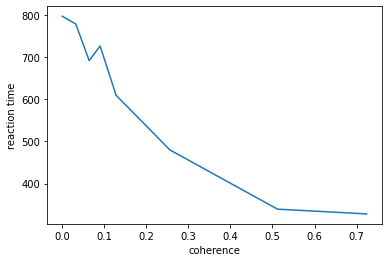

In [6]:
meanRTs = {coh: reaction_time[coherence == coh].mean() for coh in np.unique(coherence)}

pd.Series(meanRTs).plot()
plt.xlabel('coherence')
plt.ylabel('reaction time')

**Instruction**

Plot the above separately for correct and incorrect trials.

Text(0, 0.5, 'reaction time')

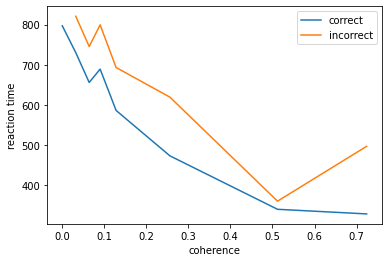

In [11]:
meanRTs_correctTrials = {coh: reaction_time[(coherence == coh) & (correct == True)].mean() for coh in np.unique(coherence)}
meanRTs_incorrectTrials = {coh: reaction_time[(coherence == coh) & (correct == False)].mean() for coh in np.unique(coherence)}

pd.Series(meanRTs_correctTrials).plot(label='correct')
pd.Series(meanRTs_incorrectTrials).plot(label='incorrect')

plt.legend()
plt.xlabel('coherence')
plt.ylabel('reaction time')

**Instruction**

Write your own function to plot the reaction time distribution so that we can reuse it later. Don't worry, I have wrote it for you. Let's move on!

In [12]:
def plot_rt_distribution(rt1, rt0, bins=None):
    '''
    # Function that takes RT data as input and plots a histogram

    rt1/rt0 : array of reaction time for correct/error trials
    bins: if given, the bins for plotting
    '''
    if bins is None:
        maxrt = max((max(rt1),max(rt0)))
        bins = np.linspace(0,maxrt,26)
    count1, bins_edge = np.histogram(rt1, bins=bins)
    count0, bins_edge = np.histogram(rt0, bins=bins)
    n_rt = len(rt0) + len(rt1)
    
    plt.figure()
    plt.bar(bins_edge[:-1], count1/n_rt, np.diff(bins_edge), color='blue', edgecolor='white')
    plt.bar(bins_edge[:-1], -count0/n_rt, np.diff(bins_edge), color='red', edgecolor='white')
    
    titletxt = 'Prop. correct {:0.2f}, '.format(sum(count1)/n_rt)
    titletxt += 'Mean RT {:0.0f}/{:0.0f} ms'.format(np.mean(rt1),np.mean(rt0))
    
    plt.ylabel('Proportion')
    plt.xlabel('Reaction Time')
    plt.title(titletxt)
    plt.xlim((bins.min(),bins.max()))

**Instruction**

Given the function I wrote for you, plot the distribution of reaction times for different coherence.

The mean percentage correct is 82.5%
Coherence 0.03, 


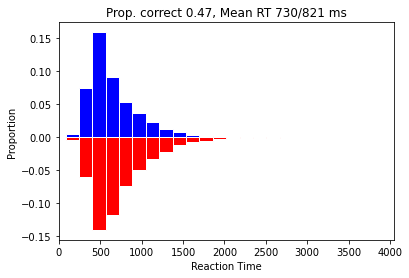

Coherence 0.06, 


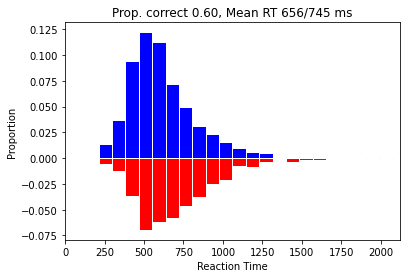

Coherence 0.09, 


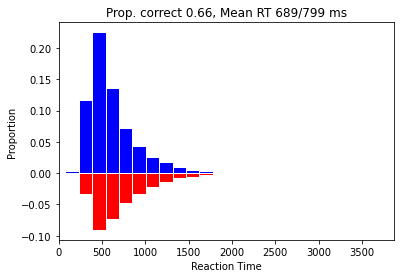

Coherence 0.13, 


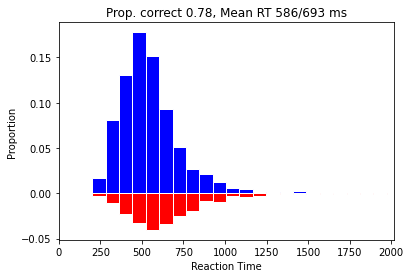

Coherence 0.26, 


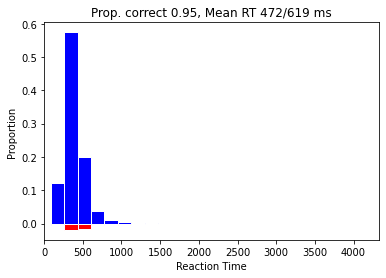

Coherence 0.51, 


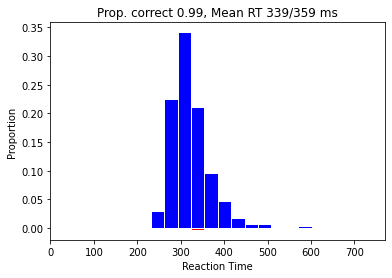

Coherence 0.72, 


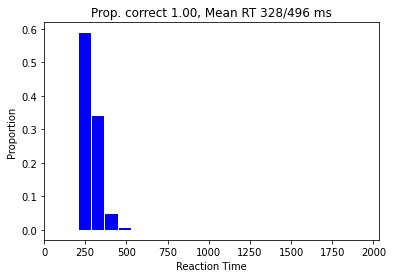

In [13]:
print('The mean percentage correct is {:0.1f}%'.format(100*np.mean(correct)))

bins = np.linspace(0,2500,26)

# Looping through all unique coherences, except for zero coherence, and plotting for each

for coh in np.unique(coherence)[1:]:
    # number of trials with this coherence
    n_coh = sum(coherence==coh) 
    
    rt1 = reaction_time[(coherence==coh ) & (correct==1)] # Correct trials
    rt0 = reaction_time[(coherence==coh ) & (correct==0)] # Error trials
    
    print('Coherence {:0.2f}, '.format(coh))
    plot_rt_distribution(rt1, rt0)
    plt.show()

# Problem 2: Drift Diffusion Model (DDM)

Now that we have looked at the monkey's raw reaction time and accuracy data from this discrimination task, we can begin to think about how to model this data. As you will see in the lecture given by Xiaojing next monday, DDMs predict both RT and choice accuracy data and have been used to model behavior in this sort of sequential discimination task.

**Short summary of the Drift diffusion model**

The Drift Diffusion Model arises from the Sequential Probability Ratio Test in the limit where discretely presented evidence becomes continuously presented evidence. Mathematically, the DDM is given as a stochastic differential equation

\begin{eqnarray}
dx = \mu dt + \sigma dW,
\end{eqnarray}

where
$\mu$ : Drift rate, 
$\sigma$ : Noise standard deviation, 
$dW$ : White Noise.

Ignoring the boundary conditions, the distribution of increments of $x$ from time $s$ to time $t$ is a normal distribution $\mathcal{N}$ with mean $\mu (t-s)$ and standard deviation $\sigma \sqrt{t-s}$, $(s\leq t)$:
\begin{eqnarray}
X_t-X_s \sim \mathcal{N}(\mu (t-s), \sigma \sqrt{t-s}).
\end{eqnarray}

In discrete time form, the increment of the decision variable $\Delta x$ after time $\Delta t$ is
\begin{eqnarray}
\Delta x \sim \mathcal{N}(\mu \Delta t, \sigma \sqrt{\Delta t}).
\end{eqnarray}

Now consider two absorbing boundaries at $\pm B$. A decision is committed once the decision variable reaches one of the boundaries. In other words, the decision variable is "absorbed" by the boundary.

*References:*

Ratcliff, Roger. "A theory of memory retrieval." Psychological review 85.2 (1978): 59.

Bogacz, Rafal, et al. "The physics of optimal decision making: a formal analysis of models of performance in two-alternative forced-choice tasks." Psychological review 113.4 (2006): 700.

**In this exercise**, we'll write a function that simulates RTs and choices using a DDM with constant decision boundaries. We will plot this data, using the function written above, and in doing this we will begin to see **how the model generated behavior compares to the monkey RT and choice data**. In particular, we will play with some of the parameters of the DDM and look at the effects this has on the simulated data. In order to simulate the data, remember the key equations of the DDM:

\begin{eqnarray}
\Delta x \sim \mathcal{N}(\mu \Delta t, \sigma \sqrt{\Delta t}).
\end{eqnarray}

which describes the incremental change in the decision variable $\Delta x$ after time $\Delta t$.

Next, we will relax certain conditions of the DDM and see how this affects the simulated behavior. In particular, we will introduce **time-varying drift** and **collapsing decision bounds**. 

Finally, we will look at the analytical DDM and graphically compare its predictions to our simulated RT data.

## Constant bound DDM simulation

### Decision variable trajectory

1. Write a function that simulates one trial of the DDM. The function should take parameters $\mu$, $\sigma$, and a boundary $B$ as inputs and return the choice, correctness, and reaction time for that trial, as well as the simulated trace of the decision variable (x in the equation above) and the times at which the decision variable was sampled in the simulation.
2. Plot the decision variable trajectories for 200 trials in the same figure with the following parameters: $\mu=1.5 \cdot 10^{-3}$, $\sigma=0.05$, $B=1$.
3. (Optional) Change the parameters $\mu, \sigma$, and observe the change in the decision variable density.

Hints: 

- adjust the alpha value of a plot to show more trajectories
- to obtain reproducible results in code that uses random numbers, set the "random seed" (np.random.seed) to an integer value of your choice (we used the trial number as seed)

In [16]:
def sim_DDM_constant(mu, sigma, B, dt=1, tMax=2500, seed=1):
    """
    Function that simulates one trial of the constant bound DDM
    
    Parameters
    ----------
    mu: float
        DDM drift rate
    sigma: float
        DDM standard-deviation
    B: float
        DDM boundary
    dt: float, optional
        time step in msec with which DDM will be integrated
    tMax: float, optional
        DDM is integrated from t=0 to t=tMax [in msec], should be multiple of dt
    seed: integer, optional
        random seed
    
    Returns
    -------
    choice: categorical
        indicates whether left or right boundary was reached by decision variable
    correct: bool
        whether or not the left boundary (which is assumed to be the target boundary) was chosen
    rt: float
        reaction time in msec
    dvTrace: list
        trace of decision variable
    tTrace: array_like
        times at which decision variable was sampled in the simulation
        
    """
    
    
    # Set random seed
    np.random.seed(seed)
    
    # Additional parameters
    n_max    = tMax / dt   # maximum number of time steps
    tSimu   = dt * np.arange(1,n_max)
    
    sigma_dt = sigma * np.sqrt(dt)
    mu_dt    = mu * dt
    
    # Initialize decision variable x
    x = 0
    
    # Storage
    tTrace = [0]
    dvTrace = [x]
    
    # Looping through time
    for t in tSimu:
        x += mu_dt + sigma_dt * np.random.randn() # internal decision variable x
        
        tTrace.append(t)
        dvTrace.append(x) # save new x

        # check boundary conditions
        if x > B:
            rt = t  
            choice = 'left'
            break
        if x < -B:
            rt = t
            choice = 'right'
            break
    else: # executed if no break has occurred in the for loop
        # If no boundary is hit before maximum time, 
        # choose according to decision variable value
        rt = t
        choice = 'left' if x > 0 else 'right'
        
    correct = (choice == 'left') # suppose left choice is correct
    
    return choice, correct, rt, dvTrace, tTrace

(-1.0, 1.0)

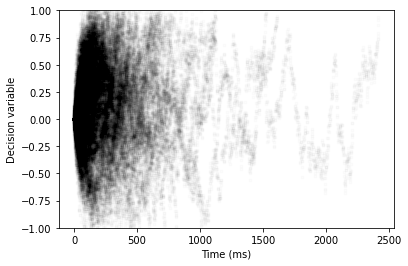

In [17]:
# Loop over trials, for each trial call your function, plot trajectories 
mu, sigma, B = 1.5*1e-3, 0.05, 1
plt.figure()
for i_trial in np.arange(200):
    choice, correct, rt, dvTrace, tTrace = sim_DDM_constant(mu, sigma, B, seed=i_trial)
    plt.plot(tTrace, dvTrace, '.', color='black', alpha=0.01)
    
# beautify plot
plt.xlabel('Time (ms)')
plt.ylabel('Decision variable')
plt.ylim((-B,B))

**Expected Output**
<img src="https://github.com/cahcharm/Neuro-and-Complexity-Science/blob/CSHA2021/tutorials/Computational%20Neuroscience/decision_making/exercise/2_drift_diffusion_model/fig/Sim_DDM_cb_DVtrajectories.png?raw=1">

### Reaction time distribution

1. Simulate the DDM for 5000 trials with $\mu=0.0015, \sigma=0.05, B=1$.
2. Plot the reaction time distribution, separating correct from error trials.

Hint: Use your plotting function from the first exercise!

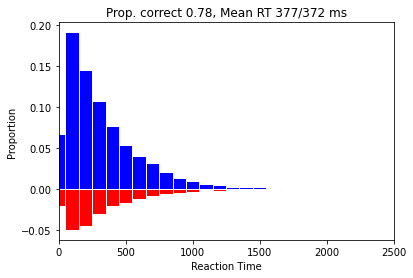

In [19]:
# Loop over trials, for each trial call your function
mu, sigma, B = 0.0015, 0.05, 1
n_trial = 5000
rts      = np.zeros(n_trial)
corrects = np.zeros(n_trial)
for i_trial in np.arange(n_trial):
    choice, correct, rt, _, _ = sim_DDM_constant(mu, sigma, B, seed=i_trial)
    rts[i_trial] = rt
    corrects[i_trial] = correct
    
# Plot the RT distributions
bins = np.linspace(0,2500,26)
plot_rt_distribution(rts[corrects==1], rts[corrects==0], bins)

**Expected Output**
<img src="https://github.com/cahcharm/Neuro-and-Complexity-Science/blob/CSHA2021/tutorials/Computational%20Neuroscience/decision_making/exercise/2_drift_diffusion_model/fig/Sim_DDM_cb_RTdistributions.png?raw=1">

# <Why the reaction time for correct trials is longer than the incorrect trials? How to modify the model?>

## [Optional] Time-varying parameters

1. Rewrite your DDM simulation function to allow its parameters $\mu$, $\sigma$ and $B$ to be arbitrary functions of time.

2. Simulate the DDM for 5000 trials with a time-varying drift $\mu=1.5\cdot 10^{-6}\cdot t$, and  $\sigma=0.05, B=1$. Plot the RT distribution, separating correct and error trials, and compare their corresponding mean RTs.

3. Simulate the DDM for 5000 trials with a collapsing bound $B = 2(1-t/\tau)$, and $\tau=2000\textrm{ms}, \mu=0.0015$, $\sigma=0.05$. Plot the RT distribution, separating correct and error trials, and compare their corresponding mean RTs.

In [20]:
# 1.

def sim_DDM_timeVarying(mu, sigma, B, dt=1, tMax=10000., seed=1):
    """
    Function that simulates one trial of the constant bound DDM
    
    Parameters
    ----------
    mu: function : time[float] -> float
        time-varying DDM drift rate
    sigma: function : time[float] -> float
        time-varying DDM standard-deviation
    B: function : time[float] -> float
        time-varying DDM boundary
    dt: float, optional
        time step in msec with which DDM will be integrated
    tMax: float, optional
        DDM is integrated from t=0 to t=tMax [in msec], should be multiple of dt
    seed: integer, optional
        random seed
    
    Returns
    -------
    choice: categorical
        indicates whether left or right boundary was reached by decision variable
    correct: bool
        whether or not the left boundary (which is assumed to be the target boundary) was chosen
    rt: float
        reaction time in msec
    dvTrace: list
        trace of decision variable
    tTrace: array_like
        times at which decision variable was sampled in the simulation
        
    """
    
    
    # Set random seed
    np.random.seed(seed)
    
    # Additional parameters
    n_max    = 10000. / dt   # maximum number of time steps
    tSimu   = dt * np.arange(1,n_max)
    
    
    # Initialize decision variable x
    x = 0
    
    # Storage
    tTrace = [0]
    dvTrace = [x]
    
    # Looping through time
    for t in tSimu:
        x += mu(t)*dt + np.random.randn() * sigma(t) * np.sqrt(dt) # internal decision variable x
        
        tTrace.append(t)
        dvTrace.append(x) # save new x

        # check boundary conditions
        B_t = B(t)
        if x > B_t:
            rt = t  
            choice = 'left'
            break
        if x < - B_t:
            rt = t
            choice = 'right'
            break
    else: # executed if no break has occurred in the for loop
        # If no boundary is hit before maximum time, 
        # choose accoring to decision variable value
        rt = t
        choice = 'left' if x > 0 else 'right'
        
    correct = (choice == 'left') # suppose left choice is correct
    
    return choice, correct, rt, dvTrace, tTrace

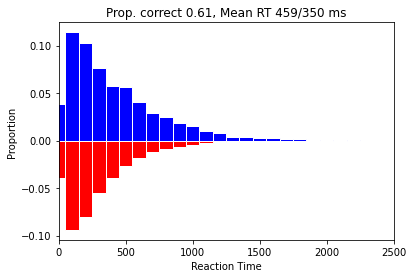

In [23]:
# 2.
f_mu = lambda t : 1.5*1e-6 * t
f_sigma = lambda t : 0.05
f_B = lambda t : 1

n_trial = 5000
rts      = np.zeros(n_trial)
corrects = np.zeros(n_trial)
for i_trial in range(n_trial):
    choice, correct, rt, _, _ = sim_DDM_timeVarying(f_mu, f_sigma, f_B, seed=i_trial)
    rts[i_trial] = rt
    corrects[i_trial] = correct

bins = np.linspace(0,2500,26)
plot_rt_distribution(rts[corrects==1], rts[corrects==0], bins)

**Expected Output**
<img src="https://github.com/cahcharm/Neuro-and-Complexity-Science/blob/CSHA2021/tutorials/Computational%20Neuroscience/decision_making/exercise/2_drift_diffusion_model/fig/Sim_DDM_vb_mu_RTdistribution.png?raw=1">

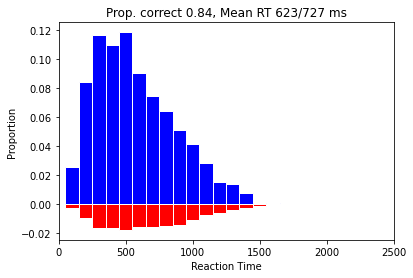

In [24]:
# 3.
f_mu = lambda t : 1.5*1e-3
f_sigma = lambda t : 0.05
f_B = lambda t : 2*(1-t/2000.)

n_trial = 5000
rts      = np.zeros(n_trial)
corrects = np.zeros(n_trial)
for i_trial in range(n_trial):
    choice, correct, rt, _, _ = sim_DDM_timeVarying(f_mu, f_sigma, f_B, seed=i_trial)
    rts[i_trial] = rt
    corrects[i_trial] = correct

bins = np.linspace(0,2500,26)
plot_rt_distribution(rts[corrects==1], rts[corrects==0], bins)

**Expected Output**
<img src="https://github.com/cahcharm/Neuro-and-Complexity-Science/blob/CSHA2021/tutorials/Computational%20Neuroscience/decision_making/exercise/2_drift_diffusion_model/fig/Sim_DDM_vb_B_RTdistribution.png?raw=1">

**The basic drift diffusion sequential sampling model of two-choice decision-making and response times (A), and variants involving time-varying boundaries (B–E):** 

Time-varying boundaries could be regarded, for example, as implementing time pressure, urgency-gating, or deadlines within a single decision trial. Another reason for considering time-varying boundaries is to broaden the types of optimality in decision-making that can be considered by diffusion models.

Ref: Zhang, S., Lee, M. D., Vandekerckhove, J., Maris, G., & Wagenmakers, E. J. (2014). Time-varying boundaries for diffusion models of decision making and response time. Frontiers in psychology, 5, 1364.

<img src="https://github.com/cahcharm/Neuro-and-Complexity-Science/blob/CSHA2021/tutorials/Computational%20Neuroscience/decision_making/exercise/2_drift_diffusion_model/fig/histgram.jpg?raw=1">


**Expected Output**
<img src="https://github.com/cahcharm/Neuro-and-Complexity-Science/blob/CSHA2021/tutorials/Computational%20Neuroscience/decision_making/exercise/2_drift_diffusion_model/fig/Cmp_Sim_Ana_cb.png?raw=1">

**Expected Output**
<img src="https://github.com/cahcharm/Neuro-and-Complexity-Science/blob/CSHA2021/tutorials/Computational%20Neuroscience/decision_making/exercise/2_drift_diffusion_model/fig/Cmp_Sim_Ana_vb.png?raw=1">